In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def custom_geometric_mean(df):
    return df.prod() ** (1 / df.count())
    # df.count(): eksik (NaN) olanları saymaz → doğru n değerini verir

In [425]:
migros=pd.read_excel("C:/Users/bora.kaya/Desktop/Migros 2016.xlsx",sheet_name="Fiyatlar")
migros=migros[migros["Unnamed: 0"].notna()].set_index("Unnamed: 0")
migros=migros.T.iloc[2:]
migros=migros.dropna(how="all")
migros.index=pd.to_datetime(migros.index)
for i in range(len(migros.columns)):
    migros.iloc[:,i]=pd.to_numeric(migros.iloc[:,i],errors="coerce")
migros=migros.resample("M").mean()
migros=migros.T
from scipy.stats import gmean

migros=migros.pct_change(axis=1).fillna(axis=1,method="ffill").fillna(0)+1
migros

,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,...,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Pirinç,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.749469,1.334278,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
Pirinç,1.0,1.000000,1.000000,1.000000,1.182149,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,0.908676,0.899497,1.00000,1.000000,1.000000
Pirinç,1.0,1.000000,1.000000,1.052104,1.000000,1.0,1.000000,0.923810,1.154639,1.008929,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
Ekmek,1.0,1.151515,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
Ekmek,1.0,1.000000,1.000000,1.038462,1.037037,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.029412,1.0,1.000000,1.000000,1.02381,1.023256,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kola,1.0,1.000000,1.000000,1.020455,1.020045,1.0,0.947598,1.070661,1.028694,0.916318,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.043077
Kola,1.0,1.000000,1.000000,1.008889,1.008811,1.0,1.000000,1.000000,1.026201,0.914894,...,1.037692,1.037806,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
Su,1.0,1.000000,1.000000,1.000000,1.021622,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.466667,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000


In [438]:
ağırlıklar2013=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2013.xls",sheet_name="Sayfa1")
ağırlıklar2013=ağırlıklar2013.iloc[8:140,[3,5,6,7,8,9,10,11,12,13,14,15,16]].set_index("Unnamed: 3")
ağırlıklar2013=ağırlıklar2013.loc[np.intersect1d(ağırlıklar2013.index.values[:130],migros.index.unique())]
for col in ağırlıklar2013.columns:
    ağırlıklar2013[col]=ağırlıklar2013[col].astype(float)
ağırlıklar2013=ağırlıklar2013.mean(axis=1)/ağırlıklar2013.mean(axis=1).sum()

In [439]:
migros_2013=migros.loc[ağırlıklar2013.index]

In [442]:
ağırlıklar2013=ağırlıklar2013.loc[migros_2013.index]
ağırlıklar2013 /= ağırlıklar2013.sum()
gfe_2013=pd.DataFrame((migros_2013.groupby(level=0).apply(custom_geometric_mean).iloc[:,:81].T*ağırlıklar2013).sum(axis=1))
gfe_2013

,0
2007-04-30,1.000000
2007-05-31,1.000683
2007-06-30,0.985302
2007-07-31,1.036716
2007-08-31,1.019057
...,...
2013-08-31,0.997556
2013-09-30,1.005429
2013-10-31,1.012363
2013-11-30,1.005901


In [445]:
ağırlıklar2014=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2014.xls",sheet_name="All Items")
ağırlıklar2014=ağırlıklar2014.iloc[4:-1,[1,3,4,5,6,7,8,9,10,11,12,13,14]].set_index("Unnamed: 1")
ağırlıklar2014=ağırlıklar2014.loc[np.intersect1d(ağırlıklar2014.index.values[:129],migros_2013.index.unique())]
for col in ağırlıklar2014.columns:
    ağırlıklar2014[col]=ağırlıklar2014[col].astype(float)
ağırlıklar2014=ağırlıklar2014.mean(axis=1)/ağırlıklar2014.mean(axis=1).sum()

In [446]:
aralık_2013=(migros_2013.groupby(level=0).mean()["2013-12-31"]*ağırlıklar2014).sum()

In [447]:
migros_2014=migros_2013.iloc[:,81:93]

In [341]:
ağırlıklar2014=ağırlıklar2014.loc[migros_2014.index]
ağırlıklar2014 /= ağırlıklar2014.sum()
gfe_2014=pd.DataFrame((migros_2014.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2014).sum(axis=1))
gfe_2014

,0
2014-01-31,1.029073
2014-02-28,0.998001
2014-03-31,1.017373
2014-04-30,1.008071
2014-05-31,0.990659
2014-06-30,0.995736
2014-07-31,1.005490
2014-08-31,1.023169
2014-09-30,0.998654
2014-10-31,0.997281


In [342]:
gfe_2014=pd.concat([gfe_2013,gfe_2014.iloc[:,0]],axis=0)
gfe_2014

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2014-08-31,1.023169
2014-09-30,0.998654
2014-10-31,0.997281
2014-11-30,1.007305


In [350]:
ağırlıklar2015=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2015.xls",sheet_name="All Items")
ağırlıklar2015=ağırlıklar2015.iloc[4:-1,[1,3,4,5,6,7,8,9,10,11,12,13,14]].set_index("Unnamed: 1")
ağırlıklar2015=ağırlıklar2015.loc[np.intersect1d(ağırlıklar2015.index.values[:128],migros_2013.index.unique())]
for col in ağırlıklar2015.columns:
    ağırlıklar2015[col]=ağırlıklar2015[col].astype(float)
ağırlıklar2015=ağırlıklar2015.mean(axis=1)/ağırlıklar2015.mean(axis=1).sum()

In [351]:
aralık_2014=(migros_2013.groupby(level=0).mean()["2014-12-31"]*ağırlıklar2015).sum()
migros_2015=migros_2013.iloc[:,93:105]
ağırlıklar2015=ağırlıklar2015.loc[migros_2015.index]
ağırlıklar2015 /= ağırlıklar2015.sum()
gfe_2015=pd.DataFrame((migros_2015.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2015).sum(axis=1))


gfe_2015=pd.concat([gfe_2014,gfe_2015.iloc[:,0]],axis=0)
gfe_2015

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2015-08-31,0.993526
2015-09-30,1.038449
2015-10-31,0.997189
2015-11-30,0.998327


In [352]:
ağırlıklar2016=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2016.xls")
ağırlıklar2016=ağırlıklar2016.iloc[4:-1,[2,4,5,6,7,8,9,10,11,12,13,14,15]].set_index("Unnamed: 2")
ağırlıklar2016=ağırlıklar2016.loc[np.intersect1d(ağırlıklar2016.index.values[:127],migros_2013.index.unique())]
for col in ağırlıklar2016.columns:
    ağırlıklar2016[col]=ağırlıklar2016[col].astype(float)
ağırlıklar2016=ağırlıklar2016.mean(axis=1)/ağırlıklar2016.mean(axis=1).sum()

In [353]:
aralık_2015=(migros_2013.groupby(level=0).mean()["2015-12-31"]*ağırlıklar2016).sum()
migros_2016=migros_2013.iloc[:,105:-1]
ağırlıklar2016=ağırlıklar2016.loc[migros_2016.index]
ağırlıklar2016 /= ağırlıklar2016.sum()
gfe_2016=pd.DataFrame((migros_2016.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2016).sum(axis=1))


gfe_2016=pd.concat([gfe_2015,gfe_2016.iloc[:,0]],axis=0)

gfe_2016

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2015-10-31,0.997189
2015-11-30,0.998327
2015-12-31,1.012852
2016-01-31,1.021130


In [356]:
migros2=pd.read_excel("C:/Users/bora.kaya/Desktop/Copy of Yeni Migros1.xlsx")
migros2=migros2[migros2["Unnamed: 0"].notna()]
migros2=migros2.set_index("Unnamed: 0")
del migros2["Unnamed: 1"]
del migros2["Ağırlık"]
migros2.columns=pd.read_excel("C:/Users/bora.kaya/Desktop/Copy of Yeni Migros1.xlsx").iloc[2].values[3:]
migros2=migros2.dropna(how="all")
migros2=migros2.T
migros2.index=pd.to_datetime(migros2.index)
for i in range(len(migros2.columns)):
    migros2.iloc[:,i]=pd.to_numeric(migros2.iloc[:,i],errors="coerce")
migros2=migros2.resample("M").mean()
migros2=migros2.T
from scipy.stats import gmean

migros2=migros2.fillna(axis=1,method="ffill")

migros2.index.name=""         
migros2=(migros2.pct_change(axis=1).fillna(method="ffill").fillna(0)+1).groupby(level=0).apply(custom_geometric_mean)
migros2

,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,...,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31
,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.823328,1.000000,0.916667,0.909091,1.000000,1.000000,0.866667,0.923077,1.000000,0.812500
Armut,1.0,1.328731,1.022104,1.054070,0.988357,0.895197,0.885486,0.954012,1.040963,1.028296,...,0.846321,0.896972,0.812991,1.157022,1.005378,1.054094,0.936465,1.078059,0.983967,1.025466
Ay Çekirdeği,1.0,1.000000,1.000000,1.000000,1.000000,0.972222,0.971429,1.000000,1.029412,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ayran,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.063520,1.064212,1.024659,1.023786,0.969536,1.000000,1.055213,1.027447,1.013246,1.012904
Ayva,1.0,1.144231,1.000000,1.000000,1.000000,1.000000,0.943978,0.881306,1.000000,1.022896,...,1.000000,0.867337,0.607184,0.793257,1.076985,0.873418,1.173913,1.305011,0.874791,0.751908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,1.0,0.996445,0.990631,0.964173,1.046968,0.993243,0.999079,0.993101,1.002211,1.016099,...,0.982196,0.998855,1.028263,1.002706,1.005312,1.000000,0.986296,1.039383,1.011913,1.000000
Çilek,1.0,0.612969,1.533036,0.997579,1.004854,1.000000,1.000000,1.137681,1.819533,1.070012,...,1.000000,1.000000,1.000000,1.000000,1.928270,0.772429,0.926346,0.908257,0.747222,1.044272
Üzüm,1.0,1.000000,1.100642,0.861813,0.797303,0.757596,1.091288,1.151255,1.142152,1.311336,...,0.880543,0.870808,1.067769,0.974813,1.000000,1.000000,1.000000,1.000000,1.000000,1.190921


In [357]:
migros2_2016=migros2.loc[np.intersect1d(migros2.index.unique(),ağırlıklar2016.index)].iloc[:,:10]
ağırlıklar2016=ağırlıklar2016.loc[migros2_2016.index]

In [358]:
ağırlıklar2016 /= ağırlıklar2016.sum()

In [359]:
gfe_2016=pd.concat([gfe_2016,(migros2_2016.T*ağırlıklar2016).fillna(method="ffill").fillna(method="bfill").sum(axis=1)],axis=0)

In [360]:
ağırlıklar2017=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2017.xls")
ağırlıklar2017=ağırlıklar2017.iloc[4:-1,[1,4]].set_index("Unnamed: 1")
ağırlıklar2017=ağırlıklar2017.loc[np.intersect1d(ağırlıklar2017.index.values[:125],migros2_2016.index.unique())]
for col in ağırlıklar2017.columns:
    ağırlıklar2017[col]=ağırlıklar2017[col].astype(float)
ağırlıklar2017=ağırlıklar2017.mean(axis=1)/ağırlıklar2017.mean(axis=1).sum()

In [361]:


aralık_2016=(migros2_2016.groupby(level=0).mean()["2016-12-31"]*ağırlıklar2017).sum()
migros_2017=migros2.iloc[:,10:22].loc[np.intersect1d(migros2.index.unique(),ağırlıklar2017.index)]
ağırlıklar2017=ağırlıklar2017.loc[migros_2017.index]
ağırlıklar2017 /= ağırlıklar2017.sum()
gfe_2017=pd.DataFrame((migros_2017.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2017).sum(axis=1))


gfe_2017=pd.concat([gfe_2016,gfe_2017.iloc[:,0]],axis=0)

gfe_2017

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2017-08-31,1.001602
2017-09-30,1.007889
2017-10-31,1.015460
2017-11-30,1.010489


In [362]:
ağırlıklar2018=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2018.xls",sheet_name="Tum Ürünler")
ağırlıklar2018=ağırlıklar2018.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2018=ağırlıklar2018.loc[np.intersect1d(ağırlıklar2018.index.values[:126],migros2_2016.index.unique())]
for col in ağırlıklar2018.columns:
    ağırlıklar2018[col]=ağırlıklar2018[col].astype(float)
ağırlıklar2018=ağırlıklar2018.mean(axis=1)/ağırlıklar2018.mean(axis=1).sum()

In [363]:


aralık_2017=(migros_2017.groupby(level=0).mean()["2017-12-31"]*ağırlıklar2018).sum()
migros_2018=migros2.iloc[:,22:35].loc[np.intersect1d(migros2.index.unique(),ağırlıklar2018.index)]

ağırlıklar2018=ağırlıklar2018.loc[migros_2018.index]
ağırlıklar2018 /= ağırlıklar2018.sum()
gfe_2018=pd.DataFrame((migros_2018.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2018).sum(axis=1))


gfe_2018=pd.concat([gfe_2017,gfe_2018.iloc[:,0]],axis=0)

gfe_2018

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2018-01-31,1.011177
2018-02-28,1.026743
2018-03-31,1.017702
2018-04-30,1.010165


In [364]:
migros_3=pd.read_excel("C:/Users/bora.kaya/Desktop/Copy of Yeni Migros1.xlsx",sheet_name="Fiyat_0918").iloc[:,:46]
migros_3=migros_3[migros_3["Unnamed: 0"].notna()]
migros_3=migros_3.set_index("Unnamed: 0")
del migros_3["Unnamed: 1"]
del migros_3["Ağırlık"]
migros_3.columns=pd.read_excel("C:/Users/bora.kaya/Desktop/Copy of Yeni Migros1.xlsx",sheet_name="Fiyat_0918").iloc[2].values[3:46]
migros_3=migros_3.dropna(how="all")
migros_3=migros_3.T
migros_3.index=pd.to_datetime(migros_3.index)
for i in range(len(migros_3.columns)):
    migros_3.iloc[:,i]=pd.to_numeric(migros_3.iloc[:,i],errors="coerce")
migros_3=migros_3.resample("M").mean()
migros_3=migros_3.T
from scipy.stats import gmean



migros_3.index.name=""         
migros_3=migros_3.iloc[:-1]

migros3=(migros_3.pct_change(axis=1).fillna(0)+1)
migros3=migros3.replace([np.inf, -np.inf], 1)
migros3=migros3.replace([0], 1)
migros3=migros3.groupby(level=0).apply(custom_geometric_mean)
migros3

,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30
,,,,,,,,,,,,,,,,,
Armut,1.0,0.870456,1.105803,1.033442,1.029021,1.096698,0.959517,0.993240,1.018678,1.075075,1.049745,0.998741,0.948220,0.973823,0.994205,1.023088,1.045215
Ay Çekirdeği,1.0,1.000000,1.000000,1.107143,1.032258,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
Ayran,1.0,1.173804,1.034292,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.024695,1.023533,1.000000,1.000000,1.000000,1.000000,1.068370
Ayva,1.0,1.000000,1.000000,1.000000,1.000000,1.280702,1.139596,0.995421,1.184014,1.158329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.660881
Ayçiçek Yağı,1.0,1.000000,1.131267,1.011904,0.975842,1.000000,1.000000,0.969690,1.000000,1.031258,1.014816,1.110279,1.000000,1.006318,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,1.0,0.793529,1.061993,1.009303,1.017706,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Çilek,1.0,1.000000,1.000000,1.000000,1.000000,2.010101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Üzüm,1.0,0.919212,1.145033,1.032466,1.017116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.082504,0.807891,0.969115,1.012639,1.126851


In [366]:
ağırlıklar2019=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2019.xls",sheet_name="Tüm")
ağırlıklar2019=ağırlıklar2019.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2019=ağırlıklar2019.loc[np.intersect1d(ağırlıklar2019.index.values[:126],migros_2018.index.unique())]
for col in ağırlıklar2019.columns:
    ağırlıklar2019[col]=ağırlıklar2019[col].astype(float)
ağırlıklar2019=ağırlıklar2019.mean(axis=1)/ağırlıklar2019.mean(axis=1).sum()

In [389]:
ağırlıklar2018=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2018.xls",sheet_name="Tum Ürünler")
ağırlıklar2018=ağırlıklar2018.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2018=ağırlıklar2018.loc[np.intersect1d(ağırlıklar2018.index.values[:126],migros2_2016.index.unique())]
for col in ağırlıklar2018.columns:
    ağırlıklar2018[col]=ağırlıklar2018[col].astype(float)
ağırlıklar2018=ağırlıklar2018.mean(axis=1)/ağırlıklar2018.mean(axis=1).sum()

In [390]:


migros_2018_2=migros3.iloc[:,:6].loc[np.intersect1d(migros3.index.unique(),ağırlıklar2018.index)]
migros_2018_2["2018-06-30"]=migros_2018_2["2018-07-31"].copy()
migros_2018_2=migros_2018_2[["2018-06-30","2018-07-31","2018-08-31","2018-09-30","2018-10-31","2018-11-30","2018-12-31"]]
ağırlıklar2018=ağırlıklar2018.loc[migros_2018_2.index]
ağırlıklar2018 /= ağırlıklar2018.sum()
gfe_2018_2=pd.DataFrame((migros_2018_2.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2018).sum(axis=1))

gfe_2018_2.loc["2018-06-30"]=1.0598
gfe_2018_2.loc["2018-07-31"]=0.9972
gfe_2018_2=pd.concat([gfe_2018,gfe_2018_2.iloc[:,0]],axis=0)

gfe_2018_2

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2018-08-31,1.093020
2018-09-30,1.072115
2018-10-31,1.011691
2018-11-30,0.988481


In [391]:


aralık_2018=(migros3.groupby(level=0).mean()["2018-12-31"]*ağırlıklar2019).sum()
migros_2019=migros3.iloc[:,6:20].loc[np.intersect1d(migros3.index.unique(),ağırlıklar2019.index)]
ağırlıklar2019=ağırlıklar2019.loc[migros_2019.index]
ağırlıklar2019 /= ağırlıklar2019.sum()
gfe_2019=pd.DataFrame((migros_2019.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2019).sum(axis=1))

gfe_2019=pd.concat([gfe_2018_2,gfe_2019.iloc[:,0]],axis=0)

gfe_2019

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2019-07-31,1.000976
2019-08-31,0.992952
2019-09-30,1.001005
2019-10-31,1.018475


In [392]:
migros_4=pd.read_excel("C:/Users/bora.kaya/Desktop/HappyCenterGidaFiyatlar1.xlsx",sheet_name="Fiyatlar").iloc[:,[0]+list(range(3,143))]
migros_4=migros_4[migros_4["Unnamed: 0"].notna()]
migros_4=migros_4.set_index("Unnamed: 0")
migros_4.columns=pd.read_excel("C:/Users/bora.kaya/Desktop/HappyCenterGidaFiyatlar1.xlsx",sheet_name="Fiyatlar").iloc[2].values[3:-8]
migros_4=migros_4.dropna(how="all")
migros_4=migros_4.T
migros_4.index=pd.to_datetime(migros_4.index)
for i in range(len(migros_4.columns)):
    migros_4.iloc[:,i]=pd.to_numeric(migros_4.iloc[:,i],errors="coerce")
migros_4=migros_4.resample("M").mean()
migros_4=migros_4.T
from scipy.stats import gmean

migros_4=migros_4.fillna(axis=1,method="ffill")

migros_4.index.name=""

migros_4=migros_4.iloc[:,6:].pct_change(axis=1).fillna(0)+1
migros_4=migros_4.replace([-np.inf,np.inf], 1)    
migros_4=migros_4.groupby(level=0).apply(custom_geometric_mean)
migros_4=migros_4.replace([-np.inf,np.inf], 1) 
migros_4=migros_4.replace([0], 1) 
migros_4

,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,1.0,1.000000,1.000000,1.166667,1.000000,1.000000,0.976190,1.097561,1.000000,1.066667,...,1.028037,1.000000,0.972727,1.014019,1.013825,1.075000,1.000000,1.093023,1.000000,1.000000
Armut,1.0,0.927543,0.966988,1.015369,1.034888,1.101480,1.014205,1.071068,1.076721,1.189353,...,1.000000,1.000000,1.000000,1.041180,1.000000,1.055972,1.050334,0.901613,0.784072,1.118146
Ay Çekirdeği,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.071429,1.000000,1.000000,...,1.027473,1.000000,0.973262,1.013736,1.013550,1.000000,1.000000,1.000000,1.000000,1.000000
Ayran,1.0,1.000000,0.942147,1.000000,1.000000,1.077783,0.754359,1.000000,1.000000,1.004202,...,1.076954,1.034602,1.060453,0.998020,1.005612,1.110821,1.000000,1.000000,1.000000,1.000000
Ayçiçek Yağı,1.0,0.990478,1.022019,1.036167,0.994263,1.000000,0.980138,1.053099,1.012906,1.052433,...,1.015492,1.005636,1.045224,1.055978,1.047115,1.055396,0.948533,1.000041,1.000000,1.118067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çay,1.0,0.979236,1.122165,1.006508,1.055654,0.968639,0.960679,1.023778,1.015230,1.008500,...,1.016411,1.134182,1.014025,0.959339,1.085143,1.006093,1.026099,1.087138,1.000000,0.973632
Çikolata Tablet,1.0,1.000000,1.000000,1.000000,1.000000,1.044552,0.960679,1.040930,1.000000,1.000000,...,0.980843,1.110487,1.033601,1.063092,1.014236,1.151918,1.000000,1.000000,1.117928,1.000000
Çilek,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [393]:


migros_2019=migros_4.iloc[:,:6].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2019.index)]
ağırlıklar2019=ağırlıklar2019.loc[migros_2019.index.unique()]
ağırlıklar2019 /= ağırlıklar2019.sum()

gfe_2019t=pd.DataFrame((migros_2019.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2019).sum(axis=1))
gfe_2019t=gfe_2019t.pct_change()+1

gfe_2019t=pd.concat([gfe_2018_2,gfe_2019t.iloc[:,0]],axis=0)

gfe_2019t.tail(5)

,0
2019-08-31,1.004697
2019-09-30,0.990569
2019-10-31,1.039689
2019-11-30,0.970305
2019-12-31,1.024142


In [394]:
gfe_2019.loc["2019-08-31":]=gfe_2019t.loc["2019-08-31":]

In [395]:
ağırlıklar2020=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2020.xls",sheet_name="Tüm")
ağırlıklar2020=ağırlıklar2020.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2020=ağırlıklar2020.loc[np.intersect1d(ağırlıklar2020.index.values[:126],migros_4.index.unique())]
for col in ağırlıklar2020.columns:
    ağırlıklar2020[col]=ağırlıklar2020[col].astype(float)
ağırlıklar2020=ağırlıklar2020.mean(axis=1)/ağırlıklar2020.mean(axis=1).sum()

In [396]:


aralık_2019=(migros_4.groupby(level=0).mean()["2019-12-31"]*ağırlıklar2020).sum()

migros_2020=migros_4.iloc[:,6:18].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2020.index)]
ağırlıklar2020=ağırlıklar2020.loc[migros_2020.index]
ağırlıklar2020 /= ağırlıklar2020.sum()
gfe_2020=pd.DataFrame((migros_2020.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2020).sum(axis=1))

gfe_2020=pd.concat([gfe_2019,gfe_2020.iloc[:,0]],axis=0)

gfe_2020

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2020-08-31,1.000000
2020-09-30,1.026793
2020-10-31,1.080240
2020-11-30,1.031957


In [397]:
ağırlıklar2021=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2021.xls",sheet_name="Tüm")
ağırlıklar2021=ağırlıklar2021.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2021=ağırlıklar2021.loc[np.intersect1d(ağırlıklar2021.index.values[:126],migros_2020.index.unique())]
for col in ağırlıklar2021.columns:
    ağırlıklar2021[col]=ağırlıklar2021[col].astype(float)
ağırlıklar2021=ağırlıklar2021.mean(axis=1)/ağırlıklar2021.mean(axis=1).sum()

In [398]:


aralık_2020=(migros_4.groupby(level=0).mean()["2020-12-31"]*ağırlıklar2021).sum()
migros_2021=migros_4.iloc[:,18:30].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2021.index)]
ağırlıklar2021=ağırlıklar2021.loc[migros_2021.index]
ağırlıklar2021 /= ağırlıklar2021.sum()
gfe_2021=pd.DataFrame((migros_2021.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2021).sum(axis=1))

gfe_2021=pd.concat([gfe_2020,gfe_2021.iloc[:,0]],axis=0)

gfe_2021

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2021-08-31,1.024648
2021-09-30,1.006174
2021-10-31,1.022324
2021-11-30,1.022394


In [399]:
ağırlıklar2022=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2022.xls",sheet_name="Tüm")
ağırlıklar2022=ağırlıklar2022.iloc[4:-1,[2,4]].set_index("Unnamed: 2")
ağırlıklar2022=ağırlıklar2022.loc[np.intersect1d(ağırlıklar2022.index.values[:126],migros_2020.index.unique())]
for col in ağırlıklar2022.columns:
    ağırlıklar2022[col]=ağırlıklar2022[col].astype(float)
ağırlıklar2022=ağırlıklar2022.mean(axis=1)/ağırlıklar2022.mean(axis=1).sum()

In [400]:


aralık_2021=(migros_4.groupby(level=0).mean()["2021-12-31"]*ağırlıklar2022).sum()
migros_2022=migros_4.iloc[:,30:42].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2022.index)]
ağırlıklar2022=ağırlıklar2022.loc[migros_2022.index]
ağırlıklar2022 /= ağırlıklar2022.sum()
gfe_2022=pd.DataFrame((migros_2022.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2021).sum(axis=1))

gfe_2022=pd.concat([gfe_2021,gfe_2022.iloc[:,0]],axis=0)

gfe_2022

,0
2007-04-30,1.000000
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2022-08-31,0.998190
2022-09-30,1.079597
2022-10-31,1.017657
2022-11-30,1.018148


In [401]:
harcama2023=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2023.xls",sheet_name="2023").iloc[:,[1,2,4]].dropna().iloc[2:39]
harcama2023=harcama2023.sort_values(by="Unnamed: 4")
harcama2023.columns=["Group_Number","Grup","Ağırlık"]
harcama2023["Ağırlık"]=harcama2023["Ağırlık"]/harcama2023["Ağırlık"].sum()
harcama2023=harcama2023.set_index("Group_Number")
harcama2023

,Grup,Ağırlık
Group_Number,,
01213,Kakao (kakaolu ürünler hariç),0.000192
01133,Konserve edilmiş veya işlenmiş balık ve deniz ...,0.001103
01116,Diğer tahıl ürünleri,0.001938
01126,Diğer etler ve yenilebilir sakatatlar,0.002337
01152,Margarin,0.003092
01223,Meyve ve sebze suları,0.004557
01184,"Yenilebilir buz, dondurma, şerbet",0.005076
01211,Kahve,0.007329
01115,Makarna çeşitleri,0.009573


In [402]:
harcama2022=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2022.xls",sheet_name="Tüm")
harcama2022=harcama2022.iloc[4:132,[1,2,4]]
harcama2022.columns=["Kod","Grup","Ağırlık"]
harcama2022["Kod"] = harcama2022["Kod"].astype(str).str[:-2]
harcama2022=harcama2022.set_index("Kod")
harcama2022.groupby(level=0)["Ağırlık"].sum()

Kod
01111     0.25643
01112    0.792633
01113    2.538462
01114    1.290626
01115    0.225904
01116    0.031175
01122    2.151546
01124    0.914973
01125     1.40226
01126    0.057378
01127    0.660605
01131    0.376573
01133    0.026931
01141    0.745441
01143    0.615645
01144    1.439018
01145    0.812968
01151    0.331837
01152    0.122176
01153    1.290576
01161    1.633854
01162     0.84458
01171     2.23524
01172    0.298829
01174    0.285865
01175    0.720857
01181    0.376406
01182    0.313568
01183    0.494447
01184     0.15652
01190    0.319172
01211    0.195668
01212    0.555469
01213    0.005815
01221    0.372541
01222    0.305012
01223    0.118598
Name: Ağırlık, dtype: object

In [403]:
harcama2023["2023 Ağırlık"]=harcama2022.groupby(level=0)["Ağırlık"].sum()/harcama2022["Ağırlık"].sum()
harcama2023["Fark"]=harcama2023["2023 Ağırlık"]-harcama2023["Ağırlık"]


In [404]:
ağırlıklar2022=pd.read_excel("C:/Users/bora.kaya/Desktop/subitem weights 2022.xls",sheet_name="Tüm")
ağırlıklar2022=ağırlıklar2022.iloc[4:132,[1,2,4]].set_index("Unnamed: 2")
ağırlıklar2022.columns=["Kod","Ağırlık"]
ağırlıklar2022["Kod"] = ağırlıklar2022["Kod"].astype(str).str[:-2]
ağırlıklar2022=ağırlıklar2022.reset_index()
ağırlıklar2022=ağırlıklar2022.set_index("Kod")

ağırlıklar2022.columns=["Grup","Ağırlık"]

In [405]:
ağırlıklar2022["Ağırlık"] /= ağırlıklar2022["Ağırlık"].sum()

In [406]:
ağırlıklar2023=pd.DataFrame()
for grup in ağırlıklar2022.index.unique():
    df=ağırlıklar2022.loc[[grup]]
    df["Pay"]=df["Ağırlık"]/df["Ağırlık"].sum()
    df["Fark"]=harcama2023.loc[grup]["Fark"]*df["Pay"]
    df["Yeni Ağırlık"]=df["Ağırlık"]+df["Fark"]
    ağırlıklar2023=pd.concat([ağırlıklar2023,df[["Grup","Yeni Ağırlık"]]],axis=0)

In [407]:
ağırlıklar2023=ağırlıklar2023.set_index("Grup")["Yeni Ağırlık"]

In [408]:


migros_2023=migros_4.iloc[:,42:54].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2023.index)]
ağırlıklar2023=ağırlıklar2023.loc[migros_2023.index]
ağırlıklar2023 /= ağırlıklar2023.sum()
gfe_2023=pd.DataFrame((migros_2023.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2023).sum(axis=1))

gfe_2023=pd.concat([gfe_2022,gfe_2023.iloc[:,0]],axis=0)

gfe_2023

,0
2007-04-30,1.0
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2023-08-31,1.055877
2023-09-30,1.044714
2023-10-31,1.040186
2023-11-30,1.022505


In [415]:
ağırlıklar2024=pd.read_csv("ağırlıklar2024.csv",index_col=0)
ağırlıklar2024["Ağırlık"] /= ağırlıklar2024["Ağırlık"].sum()
ağırlıklar2024=ağırlıklar2024.set_index("Ürün")
ağırlıklar2024

,Ağırlık
Ürün,
Antep Fıstığı,0.001981
Armut,0.002346
Ay Çekirdeği,0.007276
Ayran,0.001817
Ayva,0.000870
...,...
Çikolata Tablet,0.009575
Çilek,0.003248
Üzüm,0.006101


In [418]:


migros_2024=migros_4.iloc[:,54:66].loc[np.intersect1d(migros_4.index.unique(),ağırlıklar2024.index)]
ağırlıklar2024=ağırlıklar2024.loc[migros_2024.index]
ağırlıklar2024 /= ağırlıklar2024.sum()
gfe_2024=pd.DataFrame((migros_2024.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2024["Ağırlık"]).sum(axis=1))

gfe_2024=pd.concat([gfe_2023,gfe_2024.iloc[:,0]],axis=0)

gfe_2024

,0
2007-04-30,1.0
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2024-05-31,0.996961
2024-06-30,1.00435
2024-07-31,1.043289
2024-08-31,1.04374


In [496]:
ağırlıklar2024=pd.read_csv("ağırlıklar2024.csv",index_col=0)
ağırlıklar2024["Ağırlık"] /= ağırlıklar2024["Ağırlık"].sum()
ağırlıklar2024=ağırlıklar2024.set_index("Ürün")


In [537]:
migros5=pd.read_excel("C:/Users/bora.kaya/Desktop/Market_(Happy Center)_fiyatlar 24012025.xlsx",sheet_name="Fiyatlar Ort. (Aylık)")
migros5=migros5[migros5["Unnamed: 0"].notna()]
del migros5["Unnamed: 2"]
del migros5["Unnamed: 1"]
migros5=migros5.iloc[:,:9]
migros5=migros5.set_index("Unnamed: 0")
migros5=migros5.T
migros5.index=pd.to_datetime(migros5.index)
for i in range(len(migros5.columns)):
    migros5.iloc[:,i]=pd.to_numeric(migros5.iloc[:,i],errors="coerce")

migros5=migros5.pct_change().iloc[1:]+1
migros5=migros5.T
migros5=migros5.groupby(level=0).apply(custom_geometric_mean)
migros5

,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
Unnamed: 0,,,,,,,
Antep Fıstığı,1.000000,1.000000,1.006528,1.002162,0.994247,0.997107,1.000000
Armut,0.997598,0.985439,0.991972,0.871921,0.940678,1.000000,1.000000
Ay Çekirdeği,1.125871,0.865509,1.135751,1.002076,1.000000,1.000000,1.000000
Ayran,1.000000,1.144688,1.023228,0.974303,1.022832,0.939072,1.038484
Ayva,1.150651,1.086808,0.999771,0.937550,0.960148,1.278091,0.695198
...,...,...,...,...,...,...,...
Çikolata Tablet,1.006294,1.063177,1.043247,1.047917,1.030592,0.957463,1.066269
Çilek,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Üzüm,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [538]:
ağırlıklar2024=ağırlıklar2024.loc[migros5.index]
ağırlıklar2024 /= ağırlıklar2024.sum()
ağırlıklar2024

,Ağırlık
Unnamed: 0,
Antep Fıstığı,0.002150
Armut,0.002546
Ay Çekirdeği,0.007895
Ayran,0.001972
Ayva,0.000945
...,...
Çikolata Tablet,0.010390
Çilek,0.003524
Üzüm,0.006621


In [539]:
new_dates = pd.to_datetime(["2024-10-31", "2024-11-30", "2024-12-31"])
# Mevcut index ile yeni tarihleri birleştir
gfe_2024 = gfe_2024.reindex(gfe_2024.index.union(new_dates))
# Bu tarihlere NaN değerlerini ata
gfe_2024[0].loc[new_dates] = [1.0433,1.0510,1.0261]


In [540]:
ağırlıklar2025=pd.read_csv("ağırlıklargfe2025.csv",index_col=0)
ağırlıklar2025["Ağırlık"] /= ağırlıklar2025["Ağırlık"].sum()

ağırlıklar2025

,Unnamed: 0.1,Ağırlık,Değişim,Endeks_2024-10-31,Ağırlıklı Endeks_2024-10-31,Endeks_2024-11-01,Ağırlıklı Endeks_2024-11-01,Endeks_2024-11-02,Ağırlıklı Endeks_2024-11-02,Endeks_2024-11-03,...,Endeks_2025-06-28,Ağırlıklı Endeks_2025-06-28,Endeks_2025-06-29,Ağırlıklı Endeks_2025-06-29,Endeks_2025-06-30,Ağırlıklı Endeks_2025-06-30,Endeks_2025-07-01,Ağırlıklı Endeks_2025-07-01,Endeks_2025-07-02,Ağırlıklı Endeks_2025-07-02
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,0.0,0.001857,0.000000,100.0,0.185691,100.000000,0.185691,100.000000,0.185691,100.000000,...,135.565777,0.251733,135.565777,0.251733,137.135924,0.254648,137.180985,0.254732,137.180985,0.254732
Armut,1.0,0.002484,5.277817,100.0,0.248447,99.663073,0.247610,99.663073,0.247610,99.663073,...,99.930928,0.248275,98.428674,0.244543,100.453862,0.249575,101.131382,0.251258,100.855497,0.250573
Ay Çekirdeği,2.0,0.006820,0.000000,100.0,0.682045,98.857143,0.674250,98.857143,0.674250,98.857143,...,111.587369,0.761076,111.587369,0.761076,111.587369,0.761076,112.364536,0.766376,112.364536,0.766376
Ayran,3.0,0.001662,0.000000,100.0,0.166171,100.000000,0.166171,100.000000,0.166171,100.000000,...,118.988310,0.197724,118.988310,0.197724,118.845388,0.197487,119.325804,0.198285,119.325804,0.198285
Ayva,4.0,0.000922,0.000000,100.0,0.092174,100.000000,0.092174,100.000000,0.092174,100.000000,...,94.359919,0.086976,92.941413,0.085668,94.853700,0.087431,95.493449,0.088020,95.232944,0.087780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,123.0,0.011459,0.986509,100.0,1.145925,100.000000,1.145925,100.000000,1.145925,100.000000,...,107.713852,1.234320,105.427449,1.208119,106.428643,1.219592,117.143486,1.342376,118.299117,1.355619
Çilek,124.0,0.003439,0.000000,100.0,0.343934,100.000000,0.343934,100.000000,0.343934,100.000000,...,159.707332,0.549288,159.707332,0.549288,159.707332,0.549288,160.784493,0.552993,160.345875,0.551484
Üzüm,125.0,0.006461,0.000000,100.0,0.646115,100.000000,0.646115,100.000000,0.646115,100.000000,...,137.591762,0.889001,135.523355,0.875636,138.311772,0.893653,139.244629,0.899680,138.864771,0.897226


In [541]:


migros_2025=migros5.iloc[:,1:].loc[np.intersect1d(migros5.index.unique(),ağırlıklar2025.index)]
ağırlıklar2025=ağırlıklar2025.loc[migros_2025.index]
ağırlıklar2025 /= ağırlıklar2025.sum()
gfe_2025=pd.DataFrame((migros_2025.groupby(level=0).apply(custom_geometric_mean).T*ağırlıklar2025["Ağırlık"]).sum(axis=1))

gfe_2025=pd.concat([gfe_2024,gfe_2025.iloc[:,0]],axis=0)

gfe_2025

,0
2007-04-30,1.0
2007-05-31,1.000367
2007-06-30,0.985084
2007-07-31,1.036704
2007-08-31,1.019453
...,...
2025-02-28,1.021475
2025-03-31,1.040587
2025-04-30,1.001466
2025-05-31,0.995812


In [104]:
import requests
import json
from urllib.parse import urlencode
import warnings
from datetime import date
import time
warnings.filterwarnings("ignore")
with open("C:/Users/bora.kaya/Desktop/api.txt") as api:
    key=api.read()
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2005",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])
   

    return seri


series_list=["TP.FG.J01"]
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    time.sleep(0.5)
    data=pd.concat([data,veri],axis=1)


tarih=data.iloc[:,0]



data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))





del data["Tarih"]


for col in data.columns:
    data[col]=data[col].astype(float)

In [545]:
gedik=np.cumprod(gfe_2025)*100
tüik=100*(data["TP_FG_J01"].loc["2007-04-30":"2025-06-30"]/data["TP_FG_J01"].loc["2007-04-30"])

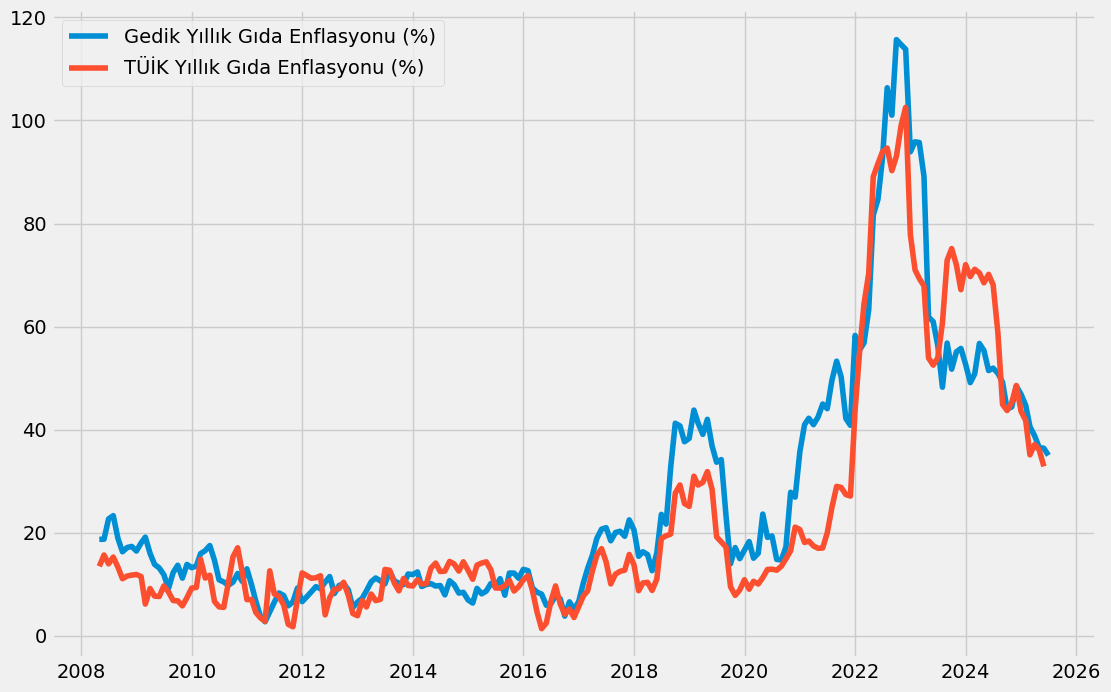

In [546]:
plt.figure(figsize=(12,8))
plt.plot(gedik.pct_change(12).dropna()*100,label="Gedik Yıllık Gıda Enflasyonu (%)")
plt.plot(tüik.pct_change(12).dropna()*100,label="TÜİK Yıllık Gıda Enflasyonu (%)")
plt.legend()

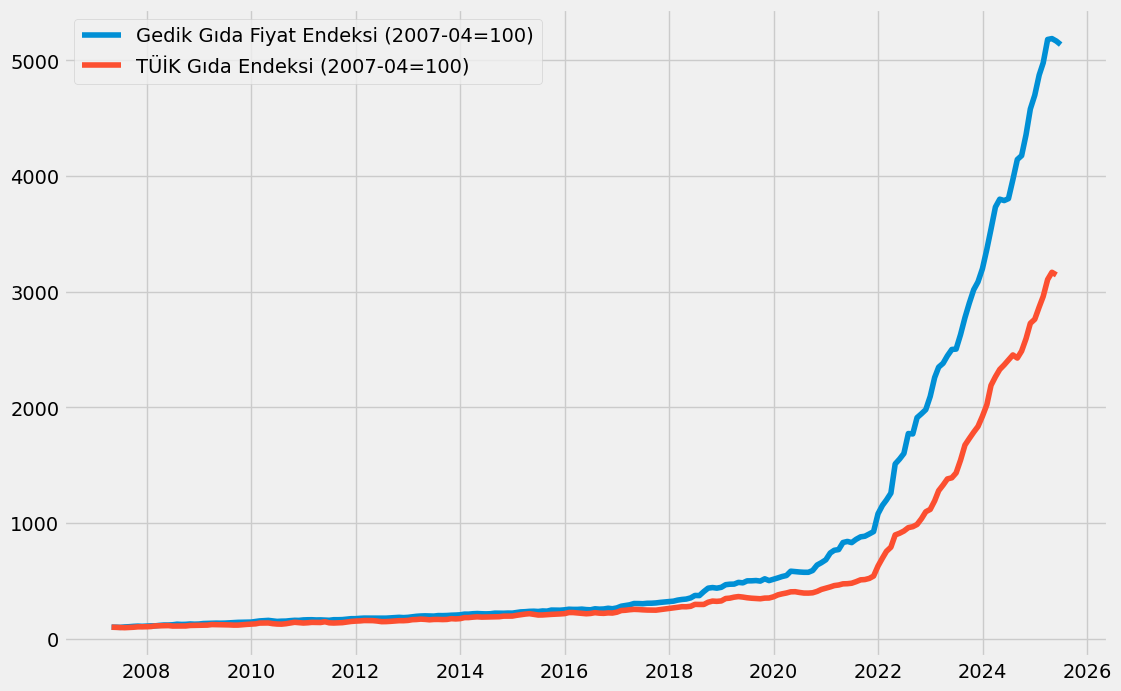

In [547]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.plot(gedik,label="Gedik Gıda Fiyat Endeksi (2007-04=100)")
plt.plot(tüik,label="TÜİK Gıda Endeksi (2007-04=100)")
plt.legend()